In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Loading Files
For the baseline model I load the first old and unreduced files to preserve the original distributions.

In [15]:
X_train = pd.read_pickle("./processed_files/OLD/01b_train_X.pkl")
y_train = pd.read_pickle("./processed_files/OLD/01b_train_y.pkl")
X_test = pd.read_pickle("./processed_files/OLD/01b_test_X.pkl")
y_test = pd.read_pickle("./processed_files/OLD/01b_test_y.pkl")

y_train_pred_B = pd.read_pickle("./processed_files/B/X_train_df.pkl")["DEP_DELAY(MINS)"].to_numpy()
y_train_true_B = pd.read_pickle("./processed_files/B/y_train_df.pkl").to_numpy().ravel()
y_test_pred_B = pd.read_pickle("./processed_files/B/X_test_df.pkl")["DEP_DELAY(MINS)"].to_numpy()
y_test_true_B = pd.read_pickle("./processed_files/B/y_test_df.pkl").to_numpy().ravel()

Data_train_show = X_train.copy()
Data_train_show["y"] = y_train["DELAY_CATEGORY"]
Data_train_show

,ARR_MIN_OF_DAY_COS,JET(YN),WINGLETS(YN),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),NR_ENGINES,APPROACH_SPEED(KMH),WINGSPAN(M),LENGTH(M),...,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,y
7876359,-0.176292,1,0,74.0,510.16078,8,3,255.576,47.335440,55.565040,...,0,0.0,0.0,3.0,3.0,2.0,0.000000,1.000000,0.984338,1
8281253,0.417745,1,1,102.0,650.17336,72,2,259.280,34.101024,44.509944,...,2,3.0,1.0,1.0,1.0,3.0,0.433884,-0.900969,-0.908564,1
11259811,0.227567,1,0,117.0,695.23488,68,2,257.428,28.446984,37.795200,...,0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969,-0.973763,1
6592688,-0.554733,1,0,139.0,402.33500,57,2,257.428,28.446984,37.795200,...,0,1.0,3.0,1.0,3.0,3.0,0.974928,-0.222521,-0.832029,0
8970026,0.503484,1,0,186.0,975.26004,72,2,257.428,28.446984,37.795200,...,0,3.0,0.0,0.0,3.0,2.0,0.433884,-0.900969,-0.864005,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7577632,-0.305184,1,1,107.0,891.57436,47,2,233.352,34.101024,33.838896,...,0,0.0,0.0,0.0,3.0,3.0,0.974928,-0.222521,0.952293,1
6856848,-0.908564,1,0,298.0,2042.25246,48,3,255.576,47.335440,55.565040,...,0,3.0,3.0,0.0,0.0,2.0,-0.974928,-0.222521,0.417745,1
10388189,-0.861970,1,0,108.0,891.57436,54,3,255.576,47.335440,55.565040,...,0,0.0,3.0,0.0,0.0,3.0,0.974928,-0.222521,0.506960,1
9936124,-0.537866,1,0,171.0,975.26004,62,3,255.576,47.335440,55.565040,...,0,3.0,3.0,3.0,0.0,0.0,0.781831,0.623490,0.843031,1


## Convert the data from DataFrames to np.arrays

In [16]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [17]:
y_train

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

Values in y_train: [0 1 2]
Number of value counts in y_train: [ 83018 158261  37818]
prob_0:0.29745214029530953
prob_1:0.5670465823710036
prob_2:0.13550127733368686



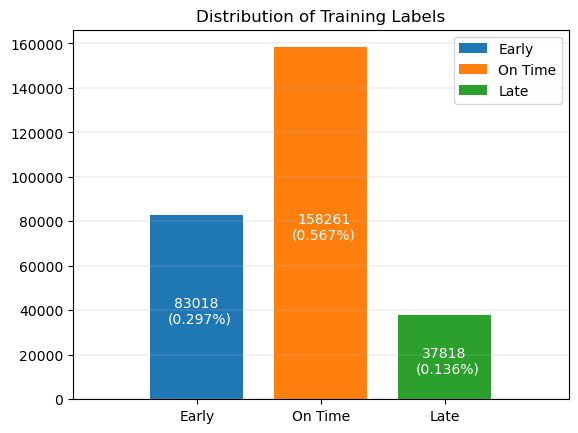

In [18]:
vals, counts = np.unique(y_train, return_counts=True)
print("Values in y_train: " + str(vals))
print("Number of value counts in y_train: " + str(counts))
prob_0 = counts[0] / len(y_train)
prob_1 = counts[1] / len(y_train)
prob_2 = counts[2] / len(y_train)
print("prob_0:"+ str(prob_0) +"\nprob_1:"+ str(prob_1) +"\nprob_2:"+ str(prob_2))

fig, ax = plt.subplots(1,1)

width = 0.75

ax.set_title("Distribution of Training Labels")
ax.set_xticks([0,1,2])
ax.set_xlim(-1,3)

ax.grid(True, axis="y", linewidth=0.25)

labels = ["Early", "On Time", "Late"]
prob_list = [prob_0, prob_1, prob_2]
ax.set_xticklabels(labels)
for cnt, v in enumerate(labels):
    ax.bar(x = cnt, height = counts[cnt], label = v, width=width)
    t1_height = counts[cnt] / 2
    ax.text(x = cnt - width / 4, y = t1_height, s = str(counts[cnt]), color="#FFFFFF")
    ax.text(x = cnt - width / 3.2, y = t1_height - 7000, s = f"({prob_list[cnt]:.3f}%)", color="#FFFFFF")

ax.legend()
print()

In [19]:
np.random.seed(42)

#Train Files
y_pred_train_bl1 = np.random.choice([0,1,2], size=(len(X_train), 1), p=[1/3,1/3,1/3])
y_pred_train_bl2 = np.random.choice([0,1,2], size=(len(X_train), 1), p=[prob_0,prob_1,prob_2])
y_pred_train_bl3 = np.ones(len(X_train), dtype=int)
y_pred_train_bl4 = list(pd.cut(y_train_pred_B, bins=[-float("inf"),-15,15,float("inf")], labels=[0,1,2]))

#Test Files
y_pred_test_bl1 = np.random.choice([0,1,2], size=(len(X_test), 1), p=[1/3,1/3,1/3])
y_pred_test_bl2 = np.random.choice([0,1,2], size=(len(X_test), 1), p=[prob_0,prob_1,prob_2])
y_pred_test_bl3 = np.ones(len(X_test), dtype=int)
y_pred_test_bl4 = list(pd.cut(y_test_pred_B, bins=[-float("inf"),-15,15,float("inf")], labels=[0,1,2]))

In [20]:
# Converting True Targets to DataFrame and Save as .pkl
y_train_true = pd.DataFrame(y_train, columns=["y_train_BL_true"])
y_test_true = pd.DataFrame(y_test, columns=["y_test_BL_true"])
y_train_true.to_pickle("./training_results/BL/y_train_true.pkl")
y_test_true.to_pickle("./training_results/BL/y_test_true.pkl")

y_train_true_B = pd.DataFrame(y_train_true_B, columns=["y_train_BL_true"])
y_test_true_B = pd.DataFrame(y_test_true_B, columns=["y_test_BL_true"])
y_train_true_B.to_pickle("./training_results/BL/y_train_true_B.pkl")
y_test_true_B.to_pickle("./training_results/BL/y_test_true_B.pkl")

#Converting Train Targets to DataFrame
y_train_pred_even = pd.DataFrame(y_pred_train_bl1, columns=["y_train_pred_BL_even"])
y_train_pred_dist = pd.DataFrame(y_pred_train_bl2, columns=["y_train_pred_BL_dist"])
y_train_pred_maj = pd.DataFrame(y_pred_train_bl3, columns=["y_train_pred_BL_maj"])
y_train_pred_delay = pd.DataFrame(y_pred_train_bl4, columns=["y_train_pred_BL_delay"])
#Converting Test Targets to DataFrame
y_test_pred_even = pd.DataFrame(y_pred_test_bl1, columns=["y_test_pred_BL_even"])
y_test_pred_dist = pd.DataFrame(y_pred_test_bl2, columns=["y_test_pred_BL_dist"])
y_test_pred_maj = pd.DataFrame(y_pred_test_bl3, columns=["y_test_pred_BL_maj"])
y_test_pred_delay = pd.DataFrame(y_pred_test_bl4, columns=["y_test_pred_BL_delay"])

#Saving Train Targets as .pkl
y_train_pred_even.to_pickle("./training_results/BL/y_train_pred_even.pkl")
y_train_pred_dist.to_pickle("./training_results/BL/y_train_pred_dist.pkl")
y_train_pred_maj.to_pickle("./training_results/BL/y_train_pred_maj.pkl")
y_train_pred_delay.to_pickle("./training_results/BL/y_train_pred_delay.pkl")
#Saving Test Targets as .pkl
y_test_pred_even.to_pickle("./training_results/BL/y_test_pred_even.pkl")
y_test_pred_dist.to_pickle("./training_results/BL/y_test_pred_dist.pkl")
y_test_pred_maj.to_pickle("./training_results/BL/y_test_pred_maj.pkl")
y_test_pred_delay.to_pickle("./training_results/BL/y_test_pred_delay.pkl")